## Exercise 2 - Euler methods

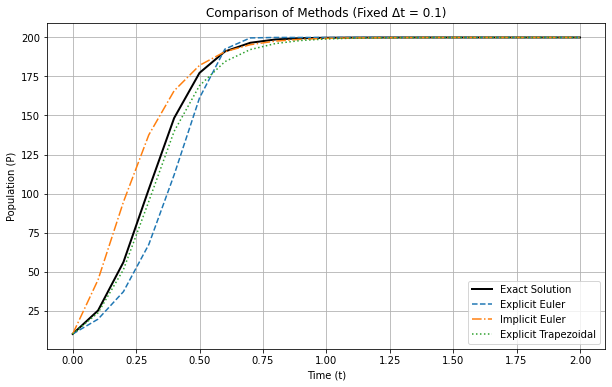

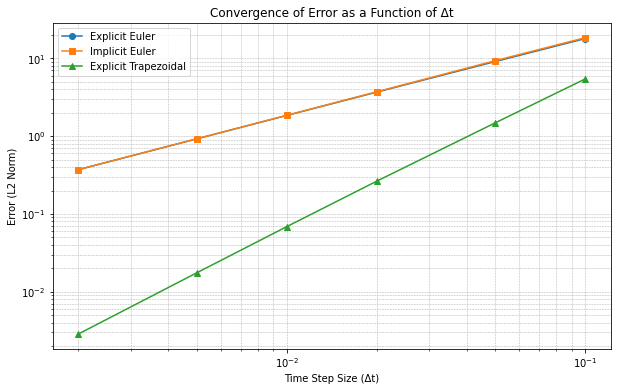

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
P0 = 10     # Initial population
r = 10      # Growth rate
K = 200     # Maximum population size
t0, T = 0, 2  # Time range
dt_fixed = 0.1  # Fixed time step for the first plot

# Exact solution
def exact_solution(t, P0, r, K):
    return K / (1 + (K - P0) / P0 * np.exp(-r * t))

# Explicit Euler method
def explicit_euler(P0, r, K, t, dt):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        P[i] = P[i - 1] + dt * r * P[i - 1] * (1 - P[i - 1] / K)
    return P

# Implicit Euler method
def implicit_euler(P0, r, K, t, dt):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        # Solve the nonlinear equation: P[i] = P[i-1] + dt * r * P[i] * (1 - P[i] / K)
        func = lambda Pi: Pi - P[i - 1] - dt * r * Pi * (1 - Pi / K)
        P[i] = fsolve(func, P[i - 1])  # Use P[i-1] as the initial guess
    return P

# Explicit Trapezoidal Rule
def explicit_trapezoidal(P0, r, K, t, dt):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        f_prev = r * P[i - 1] * (1 - P[i - 1] / K)
        P_temp = P[i - 1] + dt * f_prev  # Estimate P_temp using explicit Euler
        f_temp = r * P_temp * (1 - P_temp / K)
        P[i] = P[i - 1] + dt / 2 * (f_prev + f_temp)
    return P

# First plot: Comparison of methods for a fixed dt
t_fixed = np.arange(t0, T + dt_fixed, dt_fixed)
P_exact = exact_solution(t_fixed, P0, r, K)
P_explicit_euler = explicit_euler(P0, r, K, t_fixed, dt_fixed)
P_implicit_euler = implicit_euler(P0, r, K, t_fixed, dt_fixed)
P_trapezoidal = explicit_trapezoidal(P0, r, K, t_fixed, dt_fixed)

plt.figure(figsize=(10, 6))
plt.plot(t_fixed, P_exact, label="Exact Solution", color="black", linewidth=2)
plt.plot(t_fixed, P_explicit_euler, label="Explicit Euler", linestyle="--")
plt.plot(t_fixed, P_implicit_euler, label="Implicit Euler", linestyle="-.")
plt.plot(t_fixed, P_trapezoidal, label="Explicit Trapezoidal", linestyle=":")
plt.xlabel("Time (t)")
plt.ylabel("Population (P)")
plt.title(f"Comparison of Methods (Fixed Δt = {dt_fixed})")
plt.legend()
plt.grid()
plt.show()

# Second plot: Convergence of error as a function of Δt
dt_values = [0.1, 0.05, 0.02, 0.01, 0.005, 0.002]  # Different time step sizes
errors_explicit_euler = []
errors_implicit_euler = []
errors_trapezoidal = []

for dt in dt_values:
    t = np.arange(t0, T + dt, dt)
    P_exact = exact_solution(t, P0, r, K)
    P_explicit_euler = explicit_euler(P0, r, K, t, dt)
    P_implicit_euler = implicit_euler(P0, r, K, t, dt)
    P_trapezoidal = explicit_trapezoidal(P0, r, K, t, dt)
    
    # Compute errors (L2 norm)
    error_explicit = np.sqrt(np.sum((P_explicit_euler - P_exact) ** 2) * dt)
    error_implicit = np.sqrt(np.sum((P_implicit_euler - P_exact) ** 2) * dt)
    error_trapezoidal = np.sqrt(np.sum((P_trapezoidal - P_exact) ** 2) * dt)
    
    errors_explicit_euler.append(error_explicit)
    errors_implicit_euler.append(error_implicit)
    errors_trapezoidal.append(error_trapezoidal)

plt.figure(figsize=(10, 6))
plt.loglog(dt_values, errors_explicit_euler, label="Explicit Euler", marker="o")
plt.loglog(dt_values, errors_implicit_euler, label="Implicit Euler", marker="s")
plt.loglog(dt_values, errors_trapezoidal, label="Explicit Trapezoidal", marker="^")
plt.xlabel("Time Step Size (Δt)")
plt.ylabel("Error (L2 Norm)")
plt.title("Convergence of Error as a Function of Δt")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

